In [1]:
using Distributions
using Roots
using StatsPlots
default(fmt=:png, size=(400, 250))

In [2]:
"""
    invpdf(dist::ContinuousUnivariateDistribution, y;
        alg = Order0())

`dist` は `mode(dist)` を持つ単峰型の連続分布であると仮定する.

この函数はその分布の左側と右側での pdf の逆函数の `y` における値達のタプルを返す.
"""
function invpdf(dist::ContinuousUnivariateDistribution, y;
        alg = Order0())
    m = mode(dist)
    cdfm = cdf(dist, m)
    a0, b0 = quantile.(dist, (cdfm/2, 1 - (1-cdfm)/2))
    logy = log(y)
    f(x) = logpdf(dist, x) - logy
    a = find_zero(f, a0, alg)
    b = find_zero(f, b0, alg)
    a, b
end

@doc invpdf

```
invpdf(dist::ContinuousUnivariateDistribution, y;
    alg = Order0())
```

`dist` は `mode(dist)` を持つ単峰型の連続分布であると仮定する.

この函数はその分布の左側と右側での pdf の逆函数の `y` における値達のタプルを返す.


In [3]:
dist = Normal()
invpdf(dist, pdf(dist, mode(dist))/2)

(-1.1774100225154747, 1.1774100225154747)

In [4]:
dist = Gamma(2, 3)
invpdf(dist, pdf(dist, mode(dist))/2)

(0.6958828589596029, 8.035040970049984)

In [5]:
dist = Gamma(2, 3)
invpdf(dist, 0.05)

(0.5384738050439544, 8.980784960323133)

In [6]:
"""
    cdfinvpdf(dist::ContinuousUnivariateDistribution, y;
        alg = Order0())

`dist` は `mode(dist)` を持つ単峰型の連続分布であると仮定する.

この函数はその分布の左側と右側での pdf の逆函数の `y` における値達のあいだの区間の確率の値を返す.

"""
function cdfinvpdf(dist::ContinuousUnivariateDistribution, y;
        alg = Order0())
    a, b = invpdf(dist, y; alg)
    cdf(dist, b) - cdf(dist, a)
end

@doc cdfinvpdf

```
cdfinvpdf(dist::ContinuousUnivariateDistribution, y;
    alg = Order0())
```

`dist` は `mode(dist)` を持つ単峰型の連続分布であると仮定する.

この函数はその分布の左側と右側での pdf の逆函数の `y` における値達のあいだの区間の確率の値を返す.


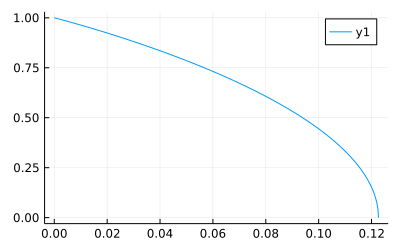

In [7]:
dist = Gamma(2, 3)
m = mode(dist)
pdfm = pdf(dist, m)
plot(y -> cdfinvpdf(dist, y), eps(), pdfm)

In [8]:
"""
    hdi(dist::ContinuousUnivariateDistribution, α = 0.05)

`dist` は `mode(dist)` を持つ単峰型の連続分布であると仮定する.

この函数はその分布の100(1-α)% HDI (highest density interval)を返す.
"""
function hdi(dist::ContinuousUnivariateDistribution, α = 0.05;
        alg = Order0())
    m = mode(dist)
    function g(y)
        a, b = invpdf(dist, y; alg)
        cdf(dist, b) - cdf(dist, a) - (1 - α)
    end
    pdfm = pdf(dist, m)
    y = find_zero(g, pdfm/2, alg)
    invpdf(dist, y; alg)
end

@doc hdi

```
hdi(dist::ContinuousUnivariateDistribution, α = 0.05)
```

`dist` は `mode(dist)` を持つ単峰型の連続分布であると仮定する.

この函数はその分布の100(1-α)% HDI (highest density interval)を返す.


In [9]:
function plot_hdi(dist, α = 0.05; alg=Order0(), kwargs...)
    @show α
    @show a, b = hdi(dist, α; alg)
    plot(dist; label="pdf")
    vline!([a, b]; label="hdi")
    plot!(; kwargs...)
end

plot_hdi (generic function with 2 methods)

α = 0.05
(a, b) = hdi(dist, α; alg) = (-1.9599639845400534, 1.9599639845400536)


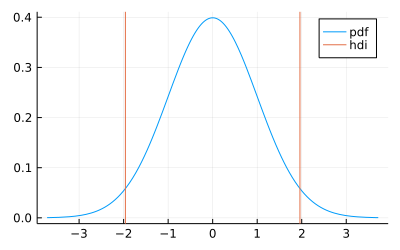

In [10]:
plot_hdi(Normal())

α = 0.05
(a, b) = hdi(dist, α; alg) = (0.1270900002898697, 14.295504742167225)


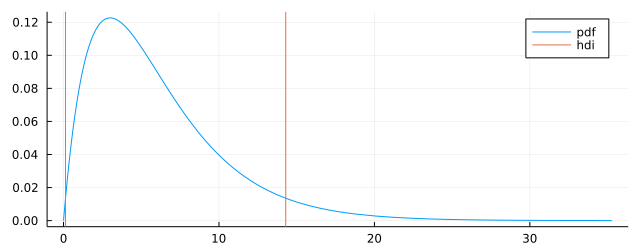

In [11]:
plot_hdi(Gamma(2, 3); size=(640, 250))

α = 0.05
(a, b) = hdi(dist, α; alg) = (4.29208256027854, 16.3036167358907)


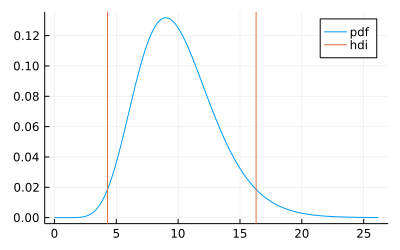

In [12]:
plot_hdi(Gamma(10, 1))

α = 0.05
(a, b) = hdi(dist, α; alg) = (0.11458418805676886, 0.5639440159142496)


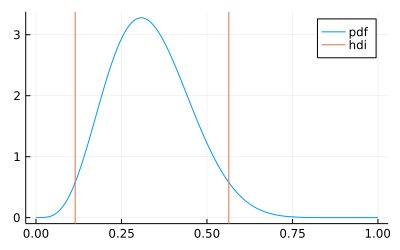

In [13]:
plot_hdi(Beta(5, 10))